In [125]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# First look at data

In [2]:
e_com=pd.read_excel(open('E Commerce Dataset.xlsx', 'rb'),sheet_name='E Comm')  
e_com.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [3]:
print ("Rows     : " ,e_com.shape[0])
print ("Columns  : " ,e_com.shape[1])
print ("\nFeatures : \n" ,e_com.columns.tolist())
print ("\nMissing values :  ", e_com.isnull().sum().values.sum())
print ("\nUnique values :  \n",e_com.nunique())

Rows     :  5630
Columns  :  20

Features : 
 ['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

Missing values :   1856

Unique values :  
 CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHi

In [4]:
e_com.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [5]:
e_com.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Outlier Detection

In [6]:
cols = ['Tenure', 'HourSpendOnApp', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','CashbackAmount','DaySinceLastOrder']
t=e_com.copy()
x = t[cols].values
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=cols, index = t.index)
t[cols] = df_temp

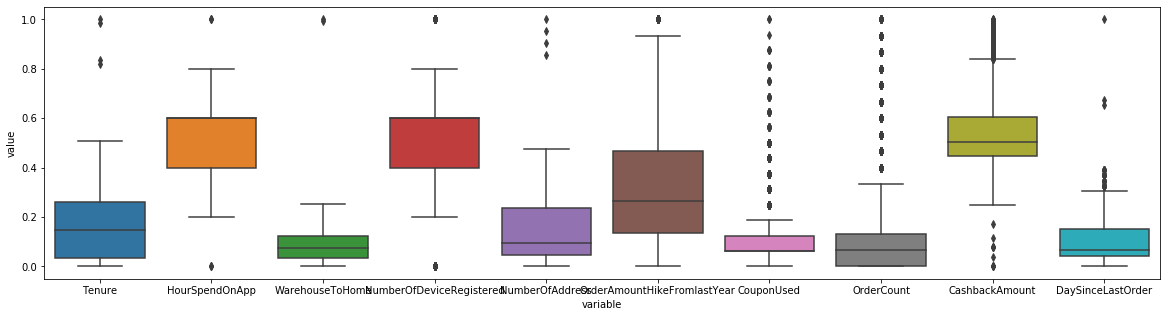

In [7]:
dfbox = pd.DataFrame(data = t, columns = cols)
plt.figure(figsize=(20,5))
sns.boxplot(x="variable", y="value", data=pd.melt(dfbox))
plt.show()

In [8]:
tenure_out=e_com[e_com['Tenure']>40]
tenure_out

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
928,50929,0,50.0,Phone,1,6.0,Debit Card,Male,3.0,1,Laptop & Accessory,3,Divorced,1,0,24.0,1.0,2.0,8.0,149.00
2719,52720,0,60.0,Mobile Phone,3,27.0,Debit Card,Female,3.0,3,Grocery,1,Married,5,1,13.0,NaN,1.0,0.0,278.75
3743,53744,0,51.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,2,Laptop & Accessory,3,Divorced,2,0,25.0,2.0,3.0,9.0,174.00
5534,55535,0,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,NaN,1.0,2.0,1.0,303.75


In [9]:
hours_out=e_com[e_com['HourSpendOnApp']==0]
hours_out

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
150,50151,0,10.0,Computer,1,6.0,Credit Card,Female,0.0,3,Fashion,2,Married,3,1,18.0,0.0,NaN,2.0,236.03
950,50951,0,5.0,Mobile Phone,1,16.0,Credit Card,Male,0.0,3,Fashion,1,Single,3,0,25.0,0.0,1.0,NaN,212.44
1950,51951,0,11.0,Computer,1,18.0,Debit Card,Male,0.0,4,Laptop & Accessory,5,Married,3,0,15.0,1.0,1.0,2.0,162.88


In [10]:
dev_out=e_com[(e_com['NumberOfDeviceRegistered']>4 )& (e_com['OrderCount']<2)]
dev_out

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93
18,50019,1,0.0,Computer,1,13.0,Debit Card,Male,3.0,5,Laptop & Accessory,3,Single,2,1,24.0,1.0,1.0,6.0,160.74
24,50025,1,14.0,Computer,1,14.0,Debit Card,Male,2.0,5,Fashion,2,Single,3,0,15.0,0.0,1.0,3.0,206.50
46,50047,1,0.0,Computer,3,NaN,COD,Female,3.0,5,Mobile,5,Single,1,0,21.0,1.0,1.0,0.0,123.25
99,50100,0,4.0,Computer,1,6.0,Credit Card,Male,2.0,5,Laptop & Accessory,3,Divorced,1,0,12.0,1.0,1.0,4.0,143.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,52654,0,11.0,Mobile Phone,3,8.0,E wallet,Female,3.0,5,Laptop & Accessory,1,Married,3,1,20.0,0.0,1.0,3.0,154.05
2669,52670,0,2.0,Mobile Phone,1,35.0,Debit Card,Male,3.0,5,Laptop & Accessory,3,Married,9,0,17.0,0.0,1.0,6.0,163.84
2711,52712,0,12.0,Computer,3,27.0,Debit Card,Female,2.0,5,Laptop & Accessory,3,Married,7,0,19.0,0.0,1.0,2.0,157.36
2747,52748,0,4.0,Mobile Phone,1,8.0,Credit Card,Female,2.0,5,Mobile Phone,1,Married,2,1,11.0,0.0,1.0,0.0,111.29


In [11]:
dist_out=e_com[e_com['WarehouseToHome']>50]
dist_out

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1309,51310,0,25.0,Computer,3,126.0,Debit Card,Male,2.0,3,Mobile,1,Married,3,0,15.0,1.0,1.0,0.0,134.82
4124,54125,0,26.0,Computer,3,127.0,Debit Card,Male,3.0,4,Mobile Phone,1,Married,4,0,16.0,2.0,2.0,1.0,159.82


In [12]:
address_out=e_com[e_com['NumberOfAddress']>12]
address_out

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
260,50261,1,NaN,Computer,1,10.0,COD,Male,2.0,3,Mobile,2,Single,19,1,23.0,1.0,1.0,0.0,122.85
691,50692,0,12.0,Computer,1,15.0,Debit Card,Male,3.0,3,Laptop & Accessory,4,Single,21,0,15.0,1.0,1.0,3.0,167.82
3075,53076,1,1.0,Computer,1,11.0,COD,Male,3.0,4,Mobile Phone,2,Single,20,1,24.0,2.0,2.0,1.0,147.85
3506,53507,0,13.0,Computer,1,16.0,Debit Card,Male,4.0,4,Laptop & Accessory,4,Single,22,0,16.0,2.0,2.0,4.0,192.82


In [13]:
orderh_out=e_com[e_com['OrderAmountHikeFromlastYear']>15]
orderh_out

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
13,50014,1,0.0,Phone,1,15.0,CC,Male,3.0,4,Mobile,3,Divorced,1,1,17.0,0.0,1.0,0.0,133.88
14,50015,1,9.0,Mobile Phone,3,15.0,Credit Card,Male,3.0,4,Fashion,2,Single,2,0,16.0,0.0,4.0,7.0,196.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623,55624,0,5.0,Computer,1,12.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Single,2,0,20.0,2.0,2.0,NaN,224.36
5624,55625,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,154.66
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91


In [14]:
dslo_out=e_com[e_com['DaySinceLastOrder']>20]
dslo_out

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1490,51491,0,3.0,Phone,1,11.0,COD,Female,2.0,3,Mobile,5,Married,6,0,14.0,0.0,2.0,30.0,132.04
2040,52041,1,0.0,Mobile Phone,3,6.0,Debit Card,Male,2.0,4,Fashion,3,Married,6,0,11.0,5.0,11.0,46.0,206.09
4305,54306,0,4.0,Mobile Phone,1,12.0,COD,Female,3.0,4,Mobile Phone,5,Married,7,0,15.0,1.0,3.0,31.0,157.04


In [15]:
e_com.drop(e_com[e_com['Tenure']>40].index,inplace=True)

In [16]:
e_com.drop(e_com[e_com['HourSpendOnApp']==0].index,inplace=True)

In [17]:
e_com.drop(e_com[e_com['NumberOfAddress']>12].index,inplace=True)

In [18]:
e_com.drop(e_com[e_com['CustomerID']==52041].index,inplace=True)#for dslo

In [19]:
tenure_out2=e_com[(e_com['Tenure']==0) & (e_com['OrderCount']!=0)]
tenure_out2

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
12,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134.41
13,50014,1,0.0,Phone,1,15.0,CC,Male,3.0,4,Mobile,3,Divorced,1,1,17.0,0.0,1.0,0.0,133.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,52779,0,0.0,Phone,3,14.0,UPI,Female,2.0,3,Laptop & Accessory,3,Married,1,1,22.0,0.0,1.0,4.0,149.07
2781,52782,0,0.0,Phone,3,NaN,CC,Male,2.0,3,Mobile,5,Single,2,1,11.0,1.0,1.0,2.0,123.80
2787,52788,1,0.0,Phone,1,7.0,Credit Card,Male,2.0,3,Mobile Phone,1,Married,10,1,14.0,2.0,2.0,2.0,147.87
2809,52810,0,0.0,Phone,3,11.0,UPI,Female,NaN,4,Mobile,3,Single,1,0,18.0,1.0,1.0,0.0,129.66


### We have found outliers in the dataset and are removing those which are not necessary.

In [20]:
e_com.corr() #correlation matrix

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,-0.018641,0.028988,0.002158,0.057835,0.598730,0.410910,-0.033286,0.165255,-0.009971,0.118923,0.234142,0.139005,0.115505,0.216985
Churn,-0.018641,1.000000,-0.350943,0.084731,0.077801,0.019233,0.107758,0.106167,0.040506,0.249974,-0.010716,-0.009140,-0.029778,-0.167171,-0.153655
Tenure,0.028988,-0.350943,1.000000,-0.063166,-0.020043,-0.025666,-0.019973,-0.011130,0.244749,-0.023725,0.002586,0.131393,0.191033,0.192480,0.477927
CityTier,0.002158,0.084731,-0.063166,1.000000,0.009632,-0.010672,0.027238,-0.010929,-0.027552,0.002842,-0.029369,0.020718,0.032485,0.014901,0.054435
WarehouseToHome,0.057835,0.077801,-0.020043,0.009632,1.000000,0.060151,0.018168,0.008091,-0.010446,0.028282,0.040488,-0.003750,0.003395,0.021298,-0.010407
HourSpendOnApp,0.598730,0.019233,-0.025666,-0.010672,0.060151,1.000000,0.318361,0.031475,0.146546,0.007374,0.109442,0.191309,0.109795,0.078505,0.122562
NumberOfDeviceRegistered,0.410910,0.107758,-0.019973,0.027238,0.018168,0.318361,1.000000,-0.017752,0.086160,0.003284,0.072083,0.151378,0.103106,0.018333,0.137415
SatisfactionScore,-0.033286,0.106167,-0.011130,-0.010929,0.008091,0.031475,-0.017752,1.000000,0.054639,-0.029565,-0.026529,0.017570,0.019508,0.031859,0.004896
NumberOfAddress,0.165255,0.040506,0.244749,-0.027552,-0.010446,0.146546,0.086160,0.054639,1.000000,-0.029109,0.012556,0.042953,-0.005763,-0.064518,0.190841
Complain,-0.009971,0.249974,-0.023725,0.002842,0.028282,0.007374,0.003284,-0.029565,-0.029109,1.000000,-0.005089,-0.007736,-0.018739,-0.041162,-0.000583


In [21]:
e_com.loc[(e_com.Tenure == 0)& (e_com.OrderCount!=0),'Tenure']=np.nan

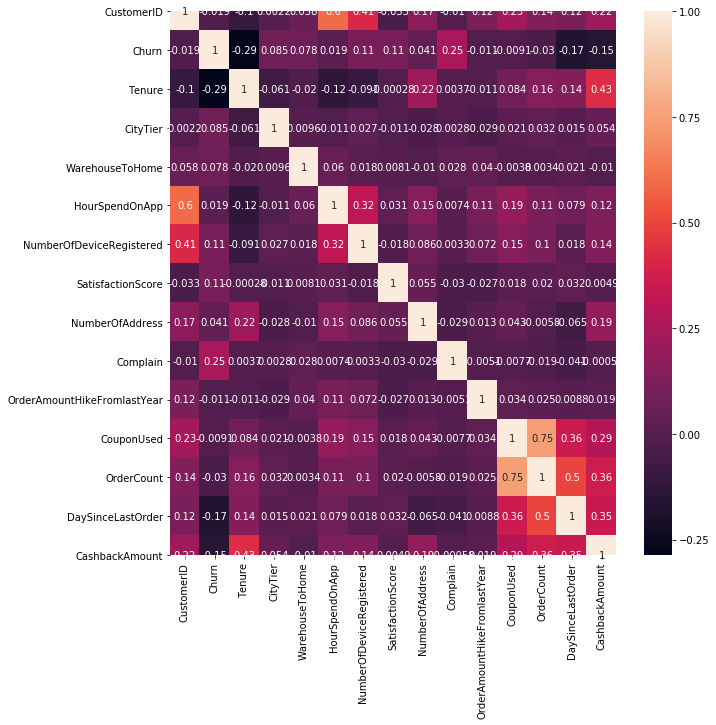

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(e_com.corr(),annot=True)
plt.show() #heatmap

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


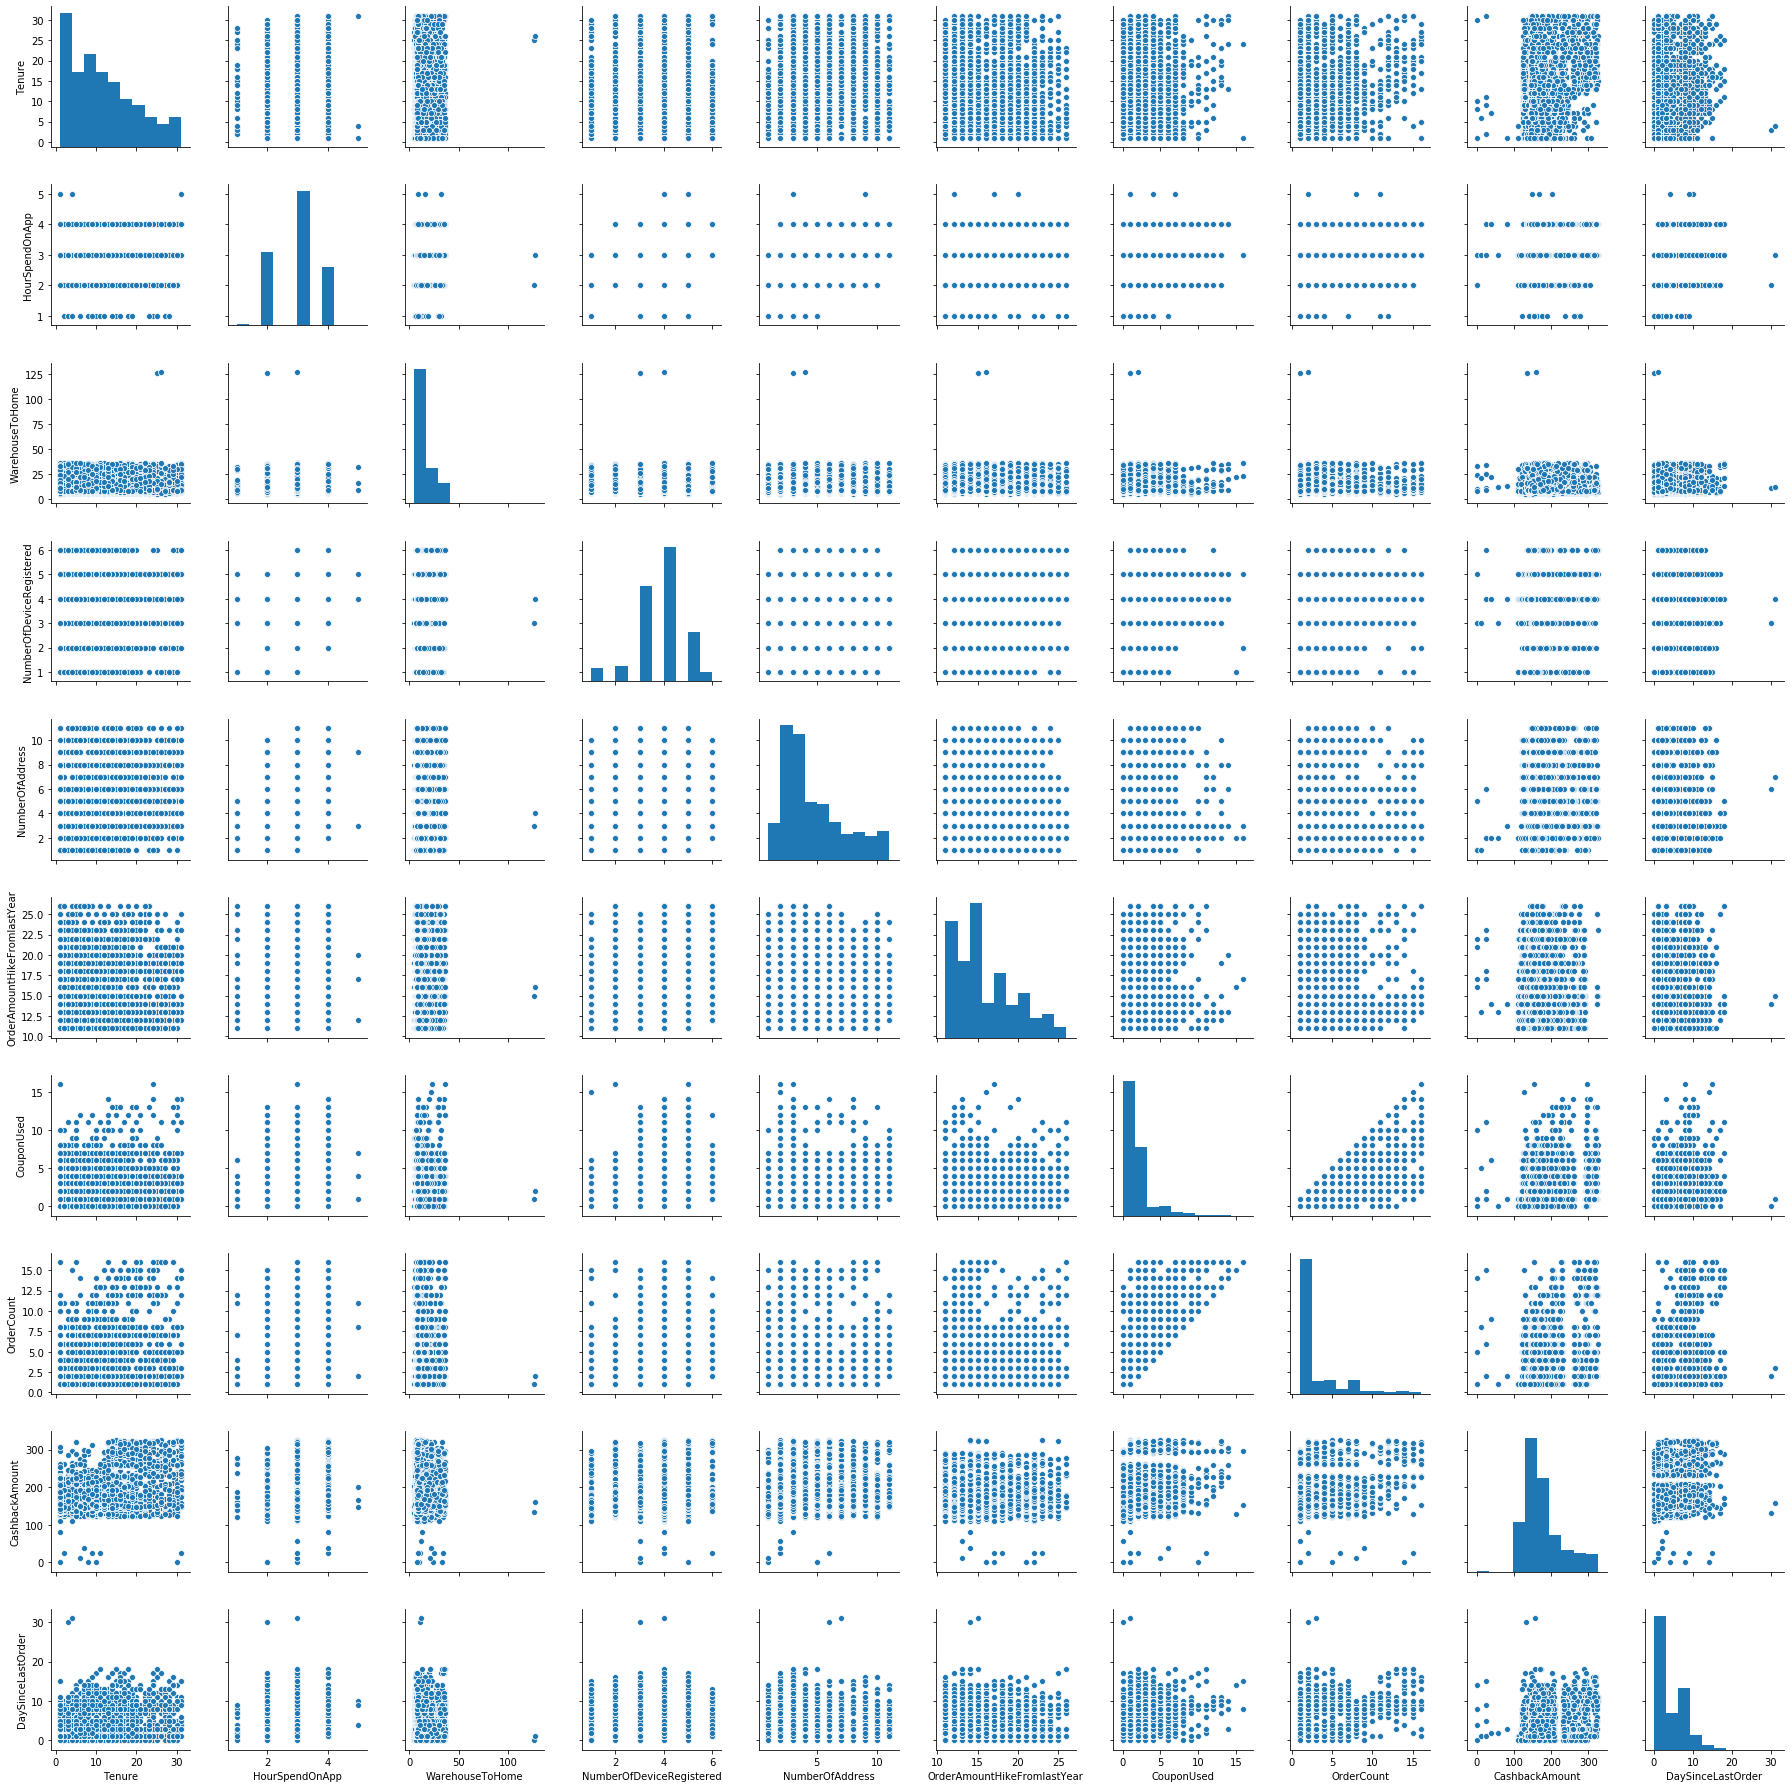

In [23]:
sns.pairplot(e_com[cols])

#### By the use of pairplot and heatmap we can see that there is some correlation among the variables

# Data Cleaning

In [24]:
missing_values_count = e_com.isnull().sum()
missing_values_count

CustomerID                       0
Churn                            0
Tenure                         770
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    264
CouponUsed                     255
OrderCount                     257
DaySinceLastOrder              306
CashbackAmount                   0
dtype: int64

## Using KNN imputer to fill in missing values.

In [25]:
test=e_com.drop(['PreferredLoginDevice', 'PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus'], axis=1)
imputer = KNNImputer()
imputer.fit(test)
test[:]=imputer.transform(test)

In [26]:
test.round(0).astype(int) #rounding those values to integer which  have been imputed 

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4,3,6,3,3,2,9,1,11,1,1,5,160
1,50002,1,18,1,8,3,4,3,7,1,15,0,1,0,121
2,50003,1,16,1,30,2,4,3,6,1,14,0,1,3,120
3,50004,1,15,3,15,2,4,5,8,0,23,0,1,3,134
4,50005,1,18,1,12,3,3,5,3,0,11,1,1,3,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10,1,30,3,2,1,6,0,18,1,2,4,151
5626,55627,0,13,1,13,3,5,5,6,0,16,1,2,3,225
5627,55628,0,1,1,11,3,2,4,3,1,21,1,2,4,186
5628,55629,0,23,3,9,4,5,4,4,0,15,2,2,9,179


In [27]:
#adding removed columns
test['PreferredLoginDevice']=e_com['PreferredLoginDevice']
test['PreferredPaymentMode']=e_com['PreferredPaymentMode']
test['Gender']=e_com['Gender']
test['PreferedOrderCat']=e_com['PreferedOrderCat']
test['MaritalStatus']=e_com['MaritalStatus']

In [28]:
e_com_clean=test# creating e_com_clean dataframe
e_com_clean['HourSpendOnApp']=e_com_clean['HourSpendOnApp'].round(0).astype(int)

In [29]:
#Combining merged fields
e_com_clean.loc[(e_com_clean.PreferredPaymentMode == 'COD'),'PreferredPaymentMode']='Cash on Delivery'
e_com_clean.loc[(e_com_clean.PreferredPaymentMode == 'CC'),'PreferredPaymentMode']='Credit Card'
e_com_clean.loc[(e_com_clean.PreferredLoginDevice == 'Mobile Phone'),'PreferredLoginDevice']='Phone'

## Grouping values so that it is easy to analyse

In [30]:
def tenure_lab(e_com_clean) :
    
    if e_com_clean["Tenure"] <= 6 :
        return "Tenure_0-6"
    elif (e_com_clean["Tenure"] > 6) & (e_com_clean["Tenure"] <= 12 ):
        return "Tenure_06-12"
    elif (e_com_clean["Tenure"] > 12) & (e_com_clean["Tenure"] <= 18) :
        return "Tenure_12-18"
    elif (e_com_clean["Tenure"] > 18) & (e_com_clean["Tenure"] <= 24) :
        return "Tenure_18-24"
    elif e_com_clean["Tenure"] > 24 :
        return "Tenure_gt_24"
    else:
        return '0'
e_com_clean["tenure_group"] = e_com_clean.apply(lambda e_com_clean:tenure_lab(e_com_clean),axis = 1)
def distance_lab(e_com_clean) :
    
    if e_com_clean["WarehouseToHome"] <= 10 :
        return "<10"
    elif (e_com_clean["WarehouseToHome"] > 10) & (e_com_clean["WarehouseToHome"] <= 20 ):
        return "10-20"
    elif (e_com_clean["WarehouseToHome"] > 20) & (e_com_clean["WarehouseToHome"] <= 30) :
        return "20-30"
    elif (e_com_clean["WarehouseToHome"] > 30) & (e_com_clean["WarehouseToHome"] <= 40) :
        return "30-40"
    elif e_com_clean["WarehouseToHome"] > 40 :
        return "gt40"
    else:
        return '0'
e_com_clean["distance_group"] = e_com_clean.apply(lambda e_com_clean:distance_lab(e_com_clean),axis = 1)
def address_lab(e_com_clean) :
    
    if e_com_clean["NumberOfAddress"] <= 5 :
        return "<5"
    elif (e_com_clean["NumberOfAddress"] > 5) & (e_com_clean["NumberOfAddress"] <= 10 ):
        return "5-10"
    elif (e_com_clean["NumberOfAddress"] > 10) & (e_com_clean["NumberOfAddress"] <= 15) :
        return "10-15"
    elif (e_com_clean["NumberOfAddress"] > 15) & (e_com_clean["NumberOfAddress"] <= 20) :
        return "15-20"
    elif e_com_clean["NumberOfAddress"] > 20 :
        return "gt20"
    else:
        return '0'
e_com_clean["NumberOfAddress_group"] = e_com_clean.apply(lambda e_com_clean:address_lab(e_com_clean),axis = 1)
def order_lab(e_com_clean) :
    
    if e_com_clean["OrderAmountHikeFromlastYear"] <= 5 :
        return "<5"
    elif (e_com_clean["OrderAmountHikeFromlastYear"] > 5) & (e_com_clean["OrderAmountHikeFromlastYear"] <= 10 ):
        return "5-10"
    elif (e_com_clean["OrderAmountHikeFromlastYear"] > 10) & (e_com_clean["OrderAmountHikeFromlastYear"] <= 15) :
        return "10-15"
    elif (e_com_clean["OrderAmountHikeFromlastYear"] > 15) & (e_com_clean["OrderAmountHikeFromlastYear"] <= 20) :
        return "15-20"
    elif e_com_clean["OrderAmountHikeFromlastYear"] > 20 :
        return "gt20"
    else:
        return '0'
e_com_clean["order_group"] = e_com_clean.apply(lambda e_com_clean:order_lab(e_com_clean),axis = 1)
def coupon_lab(e_com_clean) :
    
    if e_com_clean["CouponUsed"] <= 5 :
        return "<5"
    elif (e_com_clean["CouponUsed"] > 5) & (e_com_clean["CouponUsed"] <= 10 ):
        return "5-10"
    elif (e_com_clean["CouponUsed"] > 10) & (e_com_clean["CouponUsed"] <= 15) :
        return "10-15"
    elif (e_com_clean["CouponUsed"] > 15) & (e_com_clean["CouponUsed"] <= 20) :
        return "15-20"
    elif e_com_clean["CouponUsed"] > 20 :
        return "gt20"
    else:
        return '0'
e_com_clean["coupon_group"] = e_com_clean.apply(lambda e_com_clean:coupon_lab(e_com_clean),axis = 1)
def ordercount_lab(e_com_clean) :
    
    if e_com_clean["OrderCount"] <= 5 :
        return "<5"
    elif (e_com_clean["OrderCount"] > 5) & (e_com_clean["OrderCount"] <= 10 ):
        return "5-10"
    elif (e_com_clean["OrderCount"] > 10) & (e_com_clean["OrderCount"] <= 15) :
        return "10-15"
    elif (e_com_clean["OrderCount"] > 15) & (e_com_clean["OrderCount"] <= 20) :
        return "15-20"
    elif e_com_clean["OrderCount"] > 20 :
        return "gt20"
    else:
        return '0'
e_com_clean["ordercount_group"] = e_com_clean.apply(lambda e_com_clean:ordercount_lab(e_com_clean),axis = 1)
def dslo_lab(e_com_clean) :
    
    if e_com_clean["DaySinceLastOrder"] <= 5 :
        return "<5"
    elif (e_com_clean["DaySinceLastOrder"] > 5) & (e_com_clean["DaySinceLastOrder"] <= 10 ):
        return "5-10"
    elif (e_com_clean["DaySinceLastOrder"] > 10) & (e_com_clean["DaySinceLastOrder"] <= 15) :
        return "10-15"
    elif (e_com_clean["DaySinceLastOrder"] > 15) & (e_com_clean["DaySinceLastOrder"] <= 20) :
        return "15-20"
    elif e_com_clean["DaySinceLastOrder"] > 20 :
        return "gt20"
    else:
        return '0'
e_com_clean["dslo_group"] = e_com_clean.apply(lambda e_com_clean:dslo_lab(e_com_clean),axis = 1)
def cashback_lab(e_com_clean) :
    
    if e_com_clean["CashbackAmount"] <= 25 :
        return "<25"
    elif (e_com_clean["CashbackAmount"] > 25) & (e_com_clean["CashbackAmount"] <= 50 ):
        return "25-50"
    elif (e_com_clean["CashbackAmount"] > 50) & (e_com_clean["CashbackAmount"] <= 75) :
        return "50-75"
    elif (e_com_clean["CashbackAmount"] > 75) & (e_com_clean["CashbackAmount"] <= 100) :
        return "75-100"
    elif (e_com_clean["CashbackAmount"] > 100) & (e_com_clean["CashbackAmount"] <= 125) :
        return "100-125"
    elif (e_com_clean["CashbackAmount"] > 125) & (e_com_clean["CashbackAmount"] <= 150) :
        return "125-150"
    elif (e_com_clean["CashbackAmount"] > 150) & (e_com_clean["CashbackAmount"] <= 175) :
        return "150-175"
    elif (e_com_clean["CashbackAmount"] > 175) & (e_com_clean["CashbackAmount"] <= 200) :
        return "175-200"
    elif e_com_clean["CashbackAmount"] > 200 :
        return "gt200"
    else:
        return '0'
e_com_clean["cashback_group"] = e_com_clean.apply(lambda e_com_clean:cashback_lab(e_com_clean),axis = 1)

In [31]:
churn     = e_com_clean[e_com_clean["Churn"] == 1]
not_churn = e_com_clean[e_com_clean["Churn"] == 0]

([<matplotlib.patches.Wedge at 0x22eb7bd3d48>,
 [Text(-0.9499512634463739, 0.5546103110082232, 'No'),
  Text(0.9499512894095554, -0.5546102665377943, 'Yes')],
 [Text(-0.518155234607113, 0.30251471509539446, '83.2%'),
  Text(0.5181552487688483, -0.30251469083879684, '16.8%')])

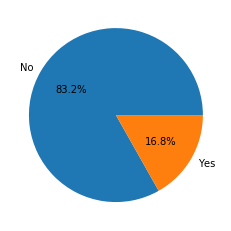

In [32]:
val = e_com_clean["Churn"].value_counts().values.tolist()
lab=['No','Yes']
plt.pie(val,labels= lab,autopct='%1.1f%%')

### Percentage of churned customers in data

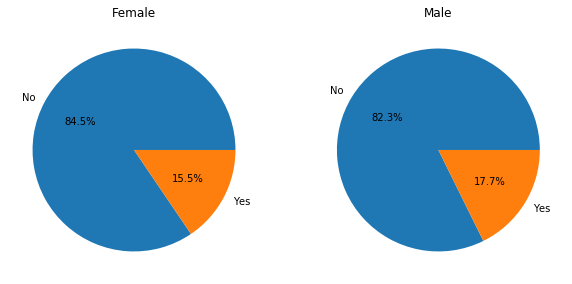

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
g=e_com_clean.groupby(['Gender'])['Churn'].value_counts()
ax1.pie(g['Female'],labels=['No','Yes'],autopct='%1.1f%%')
ax2.pie(g['Male'],labels=['No','Yes'],autopct='%1.1f%%')
ax1.title.set_text('Female')
ax2.title.set_text('Male')

### There is not much difference in percentage of male and female customers who churn 

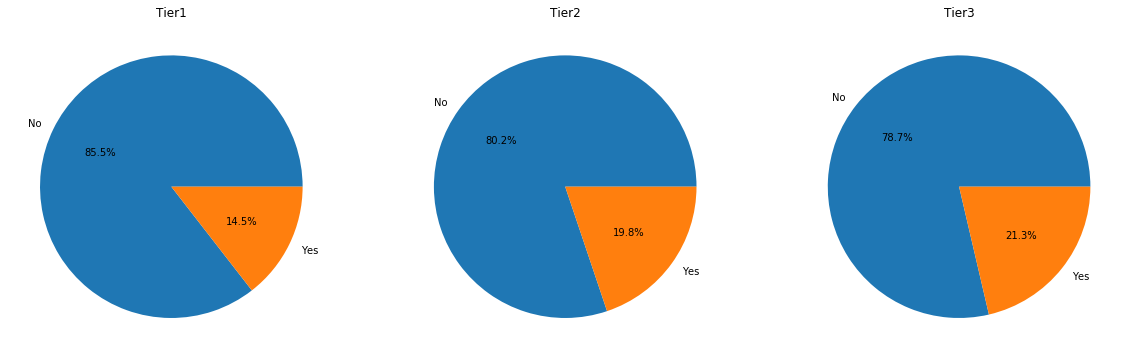

In [34]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))
g=e_com_clean.groupby(['CityTier'])['Churn'].value_counts()
ax1.pie(g[1],labels=['No','Yes'],autopct='%1.1f%%')
ax2.pie(g[2],labels=['No','Yes'],autopct='%1.1f%%')
ax3.pie(g[3],labels=['No','Yes'],autopct='%1.1f%%')
ax1.title.set_text('Tier1')
ax2.title.set_text('Tier2')
ax3.title.set_text('Tier3')

### There is a slight increase in the number of churn as tier increases

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

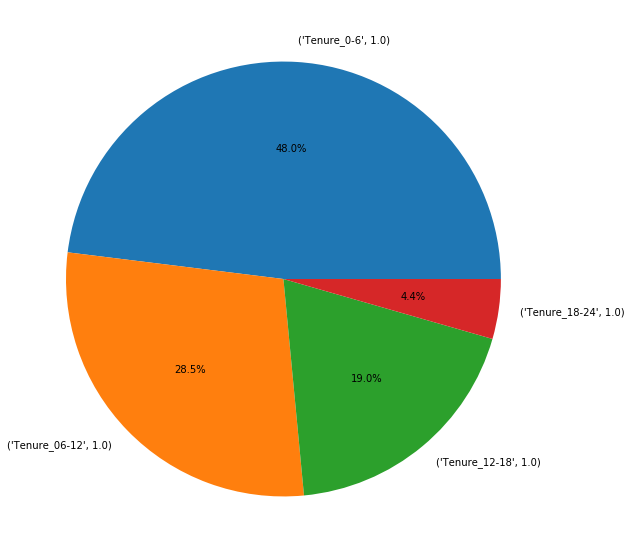

In [35]:
tenure=churn.groupby(['tenure_group'])['Churn'].value_counts()
labels=tenure.keys()
plt.figure(figsize=(10,10))
plt.pie(tenure,labels=labels,autopct='%1.1f%%')
plt

### With increase in tenure the number of churn goes down

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

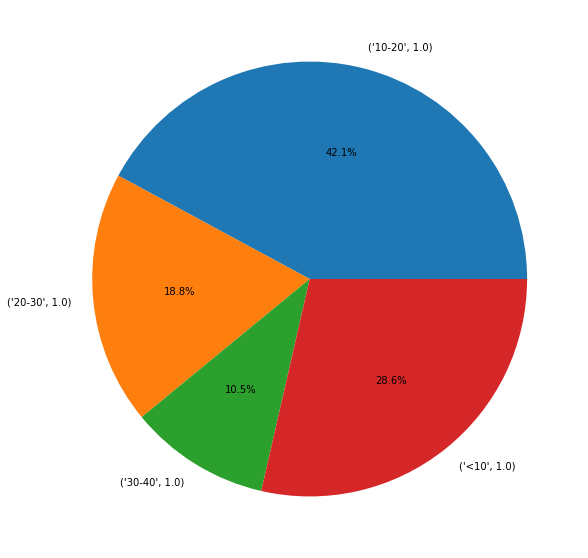

In [36]:
distance=churn.groupby(['distance_group'])['Churn'].value_counts()
labels=distance.keys()
plt.figure(figsize=(10,10))
plt.pie(distance,labels=labels,autopct='%1.1f%%')
plt

### Number of churn increases and then it decreases on basis of distance from warehouse

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

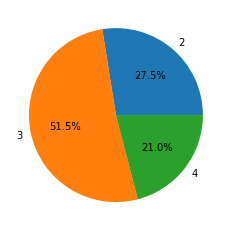

In [37]:
hours=churn.groupby(['HourSpendOnApp'])['Churn'].value_counts()
labels=['2','3','4']
plt.pie(hours,labels=labels,autopct='%1.1f%%')
plt

### Number of churn increases and then it decreases on basis of hours on app

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

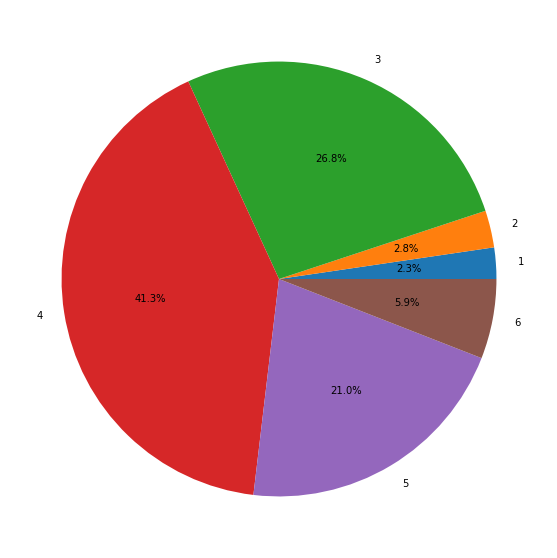

In [38]:
devices=churn.groupby(['NumberOfDeviceRegistered'])['Churn'].value_counts()
labels=['1','2','3','4','5','6']
plt.figure(figsize=(10,10))
plt.pie(devices,labels=labels,autopct='%1.1f%%')
plt

### Number of churn increases and then it decreases on basis of number of devices registered

Text(0.5, 1.0, 'Satisfaction Score: Not churn')

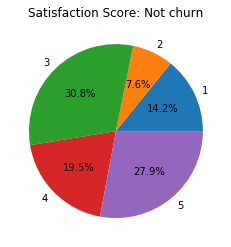

In [39]:
sat_score=churn.groupby(['SatisfactionScore'])['Churn'].value_counts()
labels=['1','2','3','4','5']
plt.pie(sat_score,labels=labels,autopct='%1.1f%%')
plt.title('Satisfaction Score: Not churn')

### There is no regularity in the number of churn and the satisfaction score

Text(0.5, 1.0, 'Number Of Device Registered:  churn')

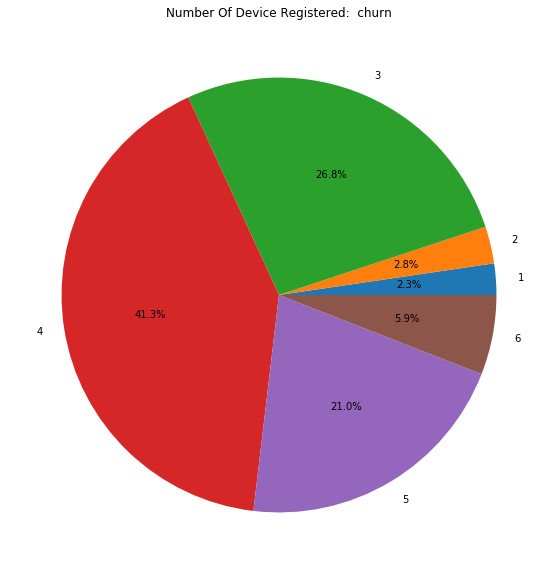

In [40]:
no_of_device=churn.groupby(['NumberOfDeviceRegistered'])['Churn'].value_counts()
labels=['1','2','3','4','5','6']
plt.figure(figsize=(10,10))
plt.pie(no_of_device,labels=labels,autopct='%1.1f%%')
plt.title('Number Of Device Registered:  churn')

### The  number of churn increases then decreases on basis of devices registered 

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

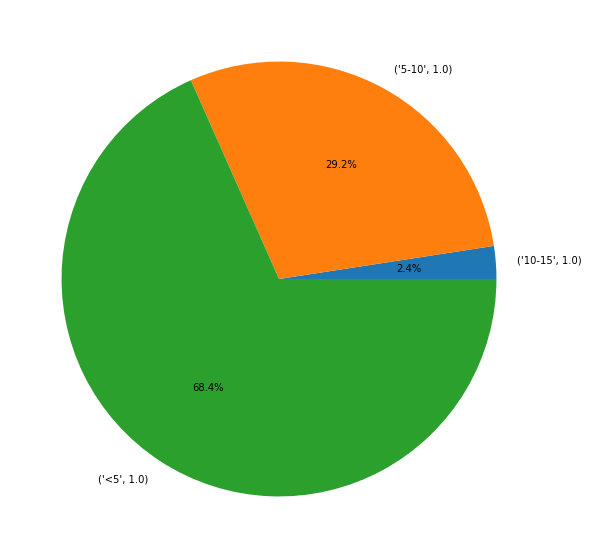

In [41]:
address=churn.groupby(['NumberOfAddress_group'])['Churn'].value_counts()
labels=address.keys()
plt.figure(figsize=(10,10))
plt.pie(address,labels=labels,autopct='%1.1f%%')
plt

#### Most churn have less than 5 addresses registered and the number decreases in upper categories

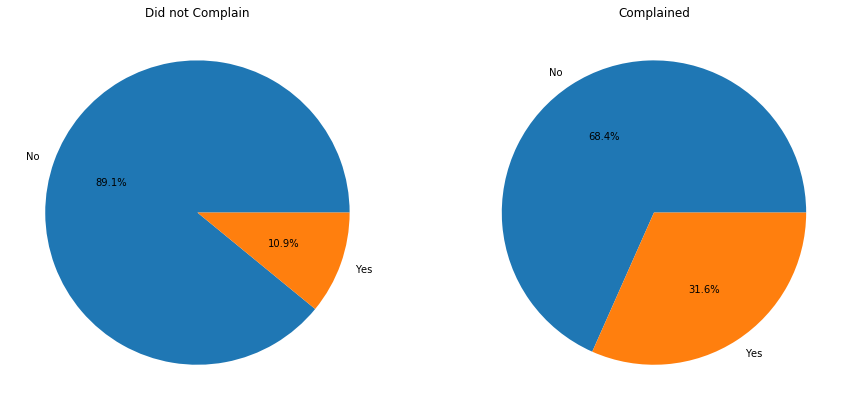

In [42]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15))
complain=e_com_clean.groupby(['Complain'])['Churn'].value_counts()
ax1.pie(complain[0],labels=['No','Yes'],autopct='%1.1f%%')
ax2.pie(complain[1],labels=['No','Yes'],autopct='%1.1f%%')
plt.title('Percentage of churn in people who did not complain and those who did.')
ax1.title.set_text('Did not Complain')
ax2.title.set_text('Complained')

### Percentage of churn customers is more in people who have complained

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

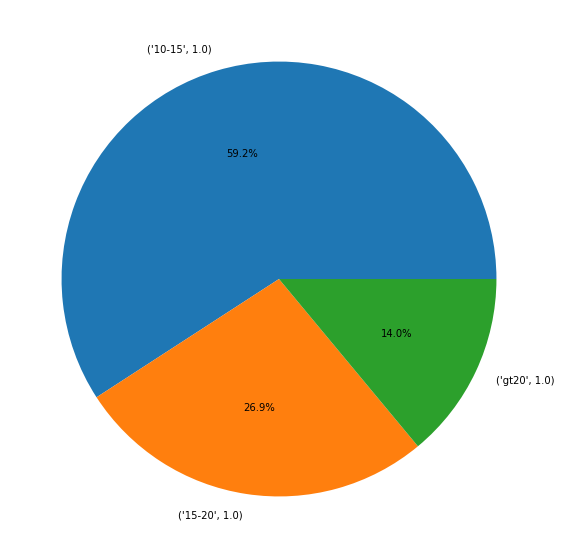

In [43]:
orderhike=churn.groupby(['order_group'])['Churn'].value_counts()
labels=orderhike.keys()
plt.figure(figsize=(10,10))
plt.pie(orderhike,labels=labels,autopct='%1.1f%%')
plt

### Most of the churn customers had order amount hike in range 10-15 

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

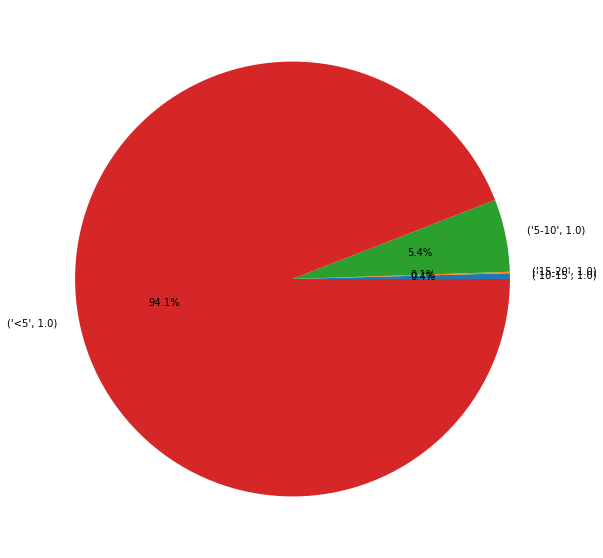

In [44]:
coupon=churn.groupby(['coupon_group'])['Churn'].value_counts()
labels=coupon.keys()
plt.figure(figsize=(10,10))
plt.pie(coupon,labels=labels,autopct='%1.1f%%')
plt

### No of coupons in churn are in range [1,5]

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

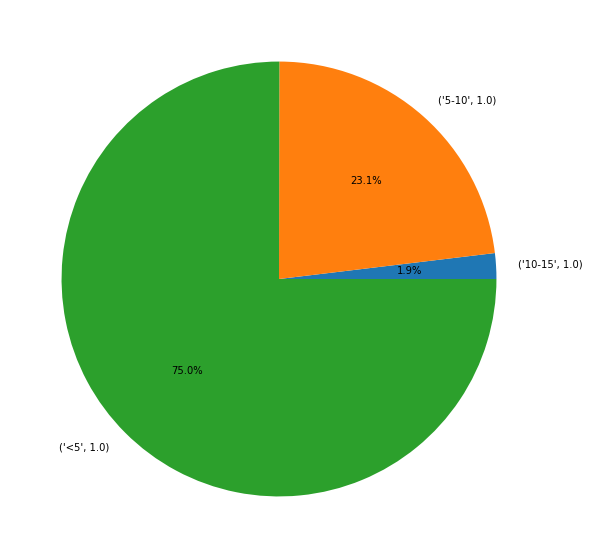

In [45]:
dslo=churn.groupby(['dslo_group'])['Churn'].value_counts()
labels=dslo.keys()
plt.figure(figsize=(10,10))
plt.pie(dslo,labels=labels,autopct='%1.1f%%')
plt

### Most of the churn people have not ordered since last 5 days or less.

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

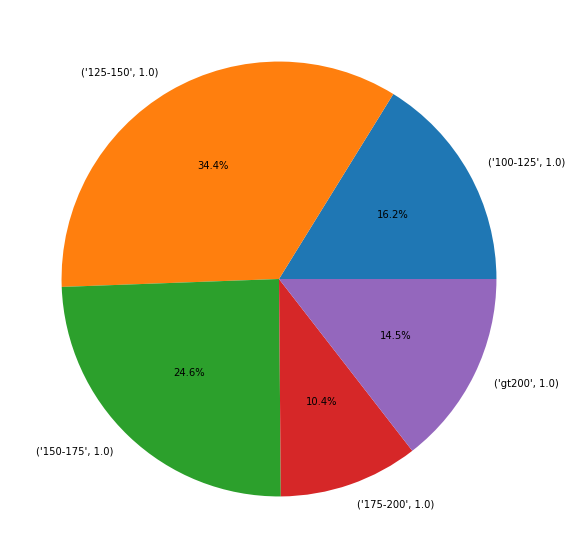

In [46]:
cashback=churn.groupby(['cashback_group'])['Churn'].value_counts()
labels=cashback.keys()
plt.figure(figsize=(10,10))
plt.pie(cashback,labels=labels,autopct='%1.1f%%')
plt

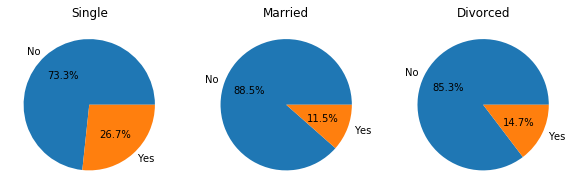

In [47]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,10))
g=e_com_clean.groupby(['MaritalStatus'])['Churn'].value_counts()
ax1.pie(g['Single'],labels=['No','Yes'],autopct='%1.1f%%')
ax2.pie(g['Married'],labels=['No','Yes'],autopct='%1.1f%%')
ax3.pie(g['Divorced'],labels=['No','Yes'],autopct='%1.1f%%')
ax1.title.set_text('Single')
ax2.title.set_text('Married')
ax3.title.set_text('Divorced')

### The percentage of churn is high in unmarried people.

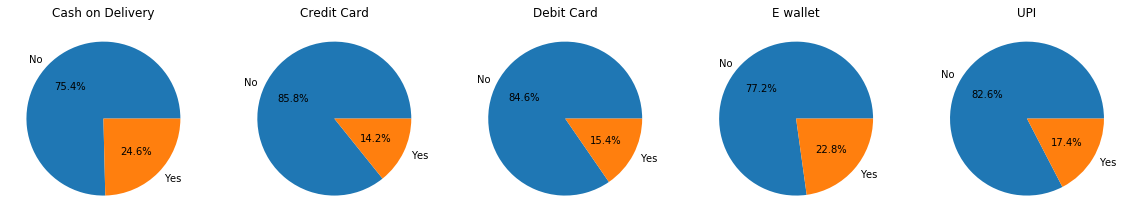

In [48]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,20))
g=e_com_clean.groupby(['PreferredPaymentMode'])['Churn'].value_counts()
ax1.pie(g['Cash on Delivery'],labels=['No','Yes'],autopct='%1.1f%%')
ax2.pie(g['Credit Card'],labels=['No','Yes'],autopct='%1.1f%%')
ax3.pie(g['Debit Card'],labels=['No','Yes'],autopct='%1.1f%%')
ax4.pie(g['E wallet'],labels=['No','Yes'],autopct='%1.1f%%')
ax5.pie(g['UPI'],labels=['No','Yes'],autopct='%1.1f%%')
ax1.title.set_text('Cash on Delivery')
ax2.title.set_text('Credit Card')
ax3.title.set_text('Debit Card')
ax4.title.set_text('E wallet')
ax5.title.set_text('UPI')

### Cash on delivery and E-wallet have high churn percentage.

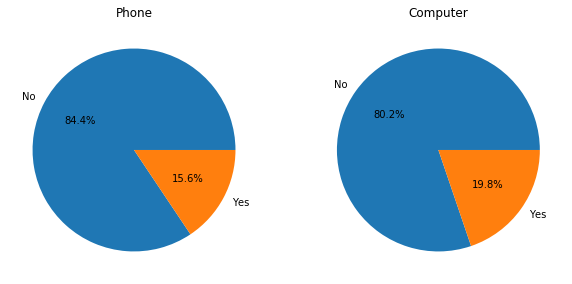

In [49]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
g=e_com_clean.groupby(['PreferredLoginDevice'])['Churn'].value_counts()
ax1.pie(g['Phone'],labels=['No','Yes'],autopct='%1.1f%%')
ax2.pie(g['Computer'],labels=['No','Yes'],autopct='%1.1f%%')
ax1.title.set_text('Phone')
ax2.title.set_text('Computer')

### Not much difference in percentage of churn on the basis of Preferred Login Device.

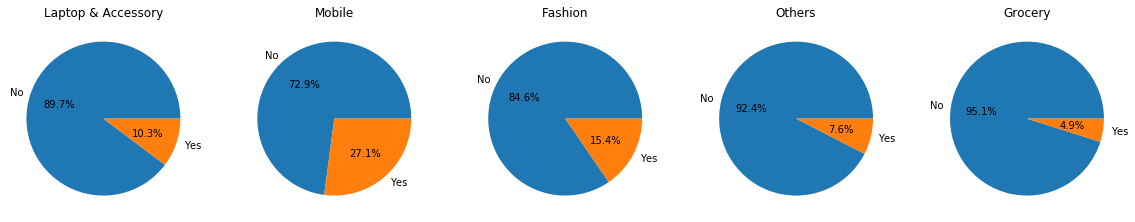

In [50]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(20,20))
g=e_com_clean.groupby(['PreferedOrderCat'])['Churn'].value_counts()
ax1.pie(g['Laptop & Accessory'],labels=['No','Yes'],autopct='%1.1f%%')
ax2.pie(g['Mobile'],labels=['No','Yes'],autopct='%1.1f%%')
ax3.pie(g['Fashion'],labels=['No','Yes'],autopct='%1.1f%%')
ax4.pie(g['Others'],labels=['No','Yes'],autopct='%1.1f%%')
ax5.pie(g['Grocery'],labels=['No','Yes'],autopct='%1.1f%%')
ax1.title.set_text('Laptop & Accessory')
ax2.title.set_text('Mobile')
ax3.title.set_text('Fashion')
ax4.title.set_text('Others')
ax5.title.set_text('Grocery')

### Mobile category has highest churn percentage.

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

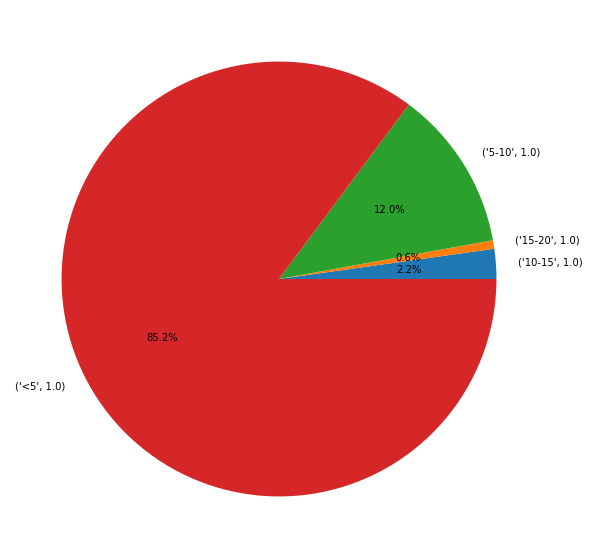

In [51]:
oc=churn.groupby(['ordercount_group'])['Churn'].value_counts()
labels=oc.keys()
plt.figure(figsize=(10,10))
plt.pie(oc,labels=labels,autopct='%1.1f%%')
plt

### Most of the people who were churn had less than 5 orders.

# Prediction model using KNN

In [52]:
le = preprocessing.LabelEncoder()
e_com_clean['te_g']=le.fit_transform(e_com_clean['tenure_group'])
e_com_clean['de_g']=le.fit_transform(e_com_clean['distance_group'])
e_com_clean['or_g']=le.fit_transform(e_com_clean['order_group'])
e_com_clean['co_g']=le.fit_transform(e_com_clean['coupon_group'])
e_com_clean['ds_g']=le.fit_transform(e_com_clean['dslo_group'])
e_com_clean['ca_g']=le.fit_transform(e_com_clean['cashback_group'])
e_com_clean['noa_g']=le.fit_transform(e_com_clean['NumberOfAddress_group'])
e_com_clean['poc']=le.fit_transform(e_com_clean['PreferedOrderCat'])
e_com_clean['ppm']=le.fit_transform(e_com_clean['PreferredPaymentMode'])
e_com_clean['orc']=le.fit_transform(e_com_clean['ordercount_group'])
e_com_clean['marit']=le.fit_transform(e_com_clean['MaritalStatus'])

In [53]:
X = e_com_clean[['CityTier', 'te_g', 'de_g','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','noa_g','Complain'
                ,'or_g','co_g','ppm','poc','marit','orc']]
y = e_com_clean['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
knn.score(X_test, y_test)

0.8868327402135231

### On removing cashback group and the days since last order, the score increases.

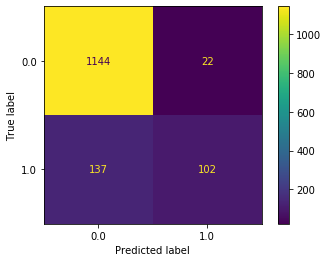

In [57]:
plot_confusion_matrix(knn, X_test, y_test)

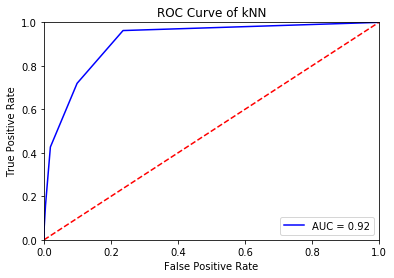

In [58]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

Text(0.5, 1.0, 'Variaion of score with k')

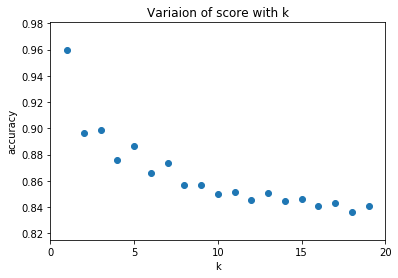

In [59]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);
plt.title('Variaion of score with k')

# Use Of decision tree

In [60]:
X = e_com_clean[['CityTier', 'te_g', 'de_g','HourSpendOnApp','NumberOfDeviceRegistered','noa_g','Complain'
                ,'or_g','co_g','ppm','poc','ca_g']]
y = e_com_clean['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [61]:
churnTree = DecisionTreeClassifier()
churnTree

DecisionTreeClassifier()

In [62]:
churnTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
churnTree_pred = churnTree.predict(X_test)

In [64]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, churnTree_pred))

DecisionTrees's Accuracy:  0.9238434163701068


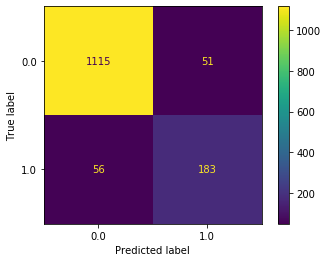

In [65]:
plot_confusion_matrix(churnTree, X_test, y_test)

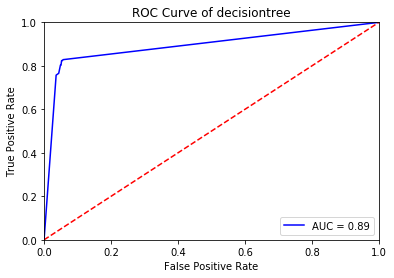

In [66]:
y_scores = churnTree.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of decisiontree')
plt.show()

In [67]:
logreg = LogisticRegression()

In [68]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [69]:
y_pred=logreg.predict(X_test)

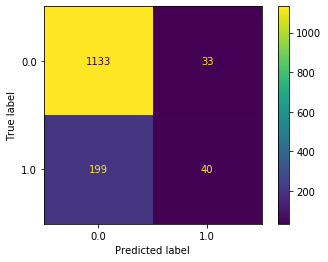

In [70]:
plot_confusion_matrix(logreg, X_test, y_test)

In [71]:
metrics.accuracy_score(y_test, y_pred)

0.8348754448398576

# Use of random forest

In [72]:
X = e_com_clean[['CityTier', 'te_g', 'de_g','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','noa_g','Complain'
                ,'or_g','co_g','ppm','poc','marit','ca_g','orc','ds_g']]
y = e_com_clean['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [73]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9473309608540925

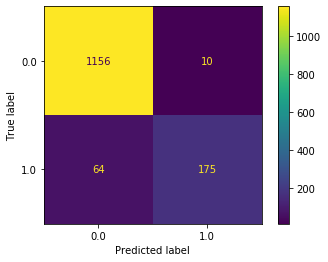

In [74]:
plot_confusion_matrix(clf, X_test, y_test)

In [75]:
con_metric = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
con_metric

,predicted 0,predicted 1
actual 0,1156,10
actual 1,64,175


In [76]:
y_train_predict = clf.predict(X_train)
model_score =clf.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9981011155945881
[[3503    4]
 [   4  702]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3507
         1.0       0.99      0.99      0.99       706

    accuracy                           1.00      4213
   macro avg       1.00      1.00      1.00      4213
weighted avg       1.00      1.00      1.00      4213



In [77]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1166
         1.0       0.95      0.73      0.83       239

    accuracy                           0.95      1405
   macro avg       0.95      0.86      0.90      1405
weighted avg       0.95      0.95      0.94      1405



In [78]:
clf = AdaBoostClassifier(n_estimators=100,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8540925266903915

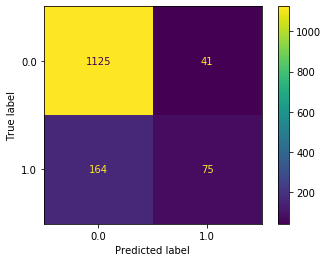

In [79]:
plot_confusion_matrix(clf, X_test, y_test)

In [80]:
clf = GradientBoostingClassifier(n_estimators=100,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8775800711743772

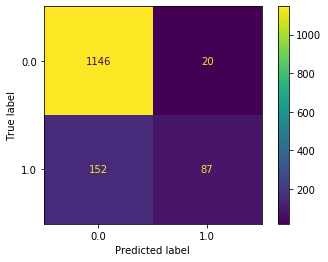

In [81]:
plot_confusion_matrix(clf, X_test, y_test)

In [82]:
X = e_com_clean[['CityTier', 'te_g', 'de_g','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','noa_g','Complain'
                ,'or_g','co_g','ppm','poc','marit','ca_g','orc','ds_g']]
y = e_com_clean['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [83]:
import xgboost as xgb
from xgboost import XGBClassifier
xgbmod=XGBClassifier(n_estimators=100, max_depth=5)

In [84]:
xgbmod.fit(X_train, y_train)
y_pred=xgbmod.predict(X_test)
accuracy_score(y_test, y_pred)

0.898220640569395

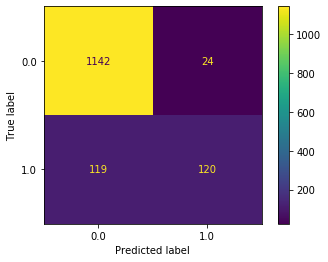

In [85]:
plot_confusion_matrix(xgbmod, X_test, y_test)

# Creating covariance matrix for determining principal components

In [86]:
X2 = e_com_clean[['CityTier', 'te_g', 'de_g','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','noa_g','Complain'
                ,'or_g','co_g','ppm','poc','marit','ca_g','ds_g']]
y2 = e_com_clean['Churn']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=0)

In [87]:
X_train2

,CityTier,te_g,de_g,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,noa_g,Complain,or_g,co_g,ppm,poc,marit,ca_g,ds_g
3321,1.0,2,0,4,2.0,2.0,2,1.0,2,3,2,4,0,2,3
5441,3.0,0,2,3,4.0,1.0,2,1.0,1,3,2,2,2,3,2
211,1.0,1,0,3,5.0,5.0,2,1.0,0,3,4,3,0,0,2
4668,1.0,1,0,3,6.0,1.0,2,0.0,0,3,2,2,2,3,2
3298,3.0,3,3,3,4.0,2.0,1,0.0,1,3,1,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,1.0,0,1,3,4.0,5.0,2,0.0,1,3,4,2,1,8,3
3273,3.0,1,0,4,4.0,5.0,1,0.0,1,3,2,2,0,3,3
1658,1.0,0,0,3,3.0,4.0,1,0.0,0,2,2,0,1,8,2
2614,2.0,2,3,3,3.0,1.0,2,0.0,0,3,2,3,2,1,2


In [88]:
cov_matrix = np.cov(X_train2.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 8.42748297e-01 -4.75548369e-02 -2.15822278e-03 -4.06708174e-03
   3.55347679e-02 -3.01325049e-02  1.82800309e-02  7.06615372e-03
  -1.21521051e-02 -7.13045295e-03  2.21375005e-01 -2.47926927e-01
   9.90704167e-03  2.02115214e-01 -1.96768064e-02]
 [-4.75548369e-02  1.47885620e+00  1.40673827e-01 -8.74865794e-02
  -6.46814263e-02  1.86632341e-02 -9.09014832e-02 -5.19877086e-03
   9.25497640e-03 -3.48211084e-02 -8.89098974e-03 -2.60734535e-01
  -5.75466341e-02  1.26163084e+00 -1.33713561e-01]
 [-2.15822278e-03  1.40673827e-01  1.75904027e+00  4.19167913e-03
   5.38912140e-02 -8.58849593e-02 -5.92702594e-03 -2.77107172e-02
  -5.20423715e-03 -1.13461950e-02 -3.11428088e-02  1.03084470e-02
  -1.81379076e-02  2.22346143e-01 -2.18763926e-03]
 [-4.06708174e-03 -8.74865794e-02  4.19167913e-03  5.16329076e-01
   2.29773691e-01  2.43467006e-02 -3.98209517e-02  1.97620128e-03
   3.68157372e-02 -1.03756766e-02 -1.64493341e-02  6.61742281e-02
  -1.32624926e-02  2.83822920e-01

In [89]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-3.18919257e-02  7.44181435e-03 -1.61713384e-01  1.84903750e-01
   2.20472508e-01  4.00240594e-01 -5.23560280e-02 -8.49103395e-01
   3.10425473e-03  2.69491260e-02  6.42818767e-03  1.37832701e-02
   5.33566937e-02 -3.46457616e-02 -3.24663306e-02]
 [-1.74700003e-01  3.74238493e-02  2.15459885e-01  4.81970694e-02
  -7.66097553e-01  2.64229710e-01 -4.91055947e-01 -6.92918631e-02
   1.10102012e-02 -7.66030021e-02 -2.77039351e-02 -9.46334250e-02
   2.03347289e-02 -1.67518774e-02 -1.63393702e-02]
 [-3.34885313e-02  4.48135784e-01  7.12670222e-01  4.89789242e-01
   2.03899107e-01 -2.54612731e-03  8.59843501e-02  2.24998054e-02
   4.22404708e-03 -3.55400207e-03  1.83376383e-02 -1.04281479e-02
  -8.18960215e-03  4.36337847e-05 -1.53964851e-02]
 [-3.01774564e-02 -1.49885266e-03  5.00196585e-02 -1.53465788e-01
   2.26879525e-01 -6.32706110e-02 -1.67116121e-01  2.16128951e-02
   1.78930465e-02 -1.55880310e-01 -6.46561139e-02 -7.67816825e-01
   4.65438676e-01 -1.26621843e-01 -1.

In [90]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 42.5191647   51.99356278  60.69508612  68.4694889   75.13284488
  80.60647086  85.24863424  88.48378071  90.92985808  93.34326627
  95.50903492  97.44082442  98.51970968  99.48567466 100.        ]


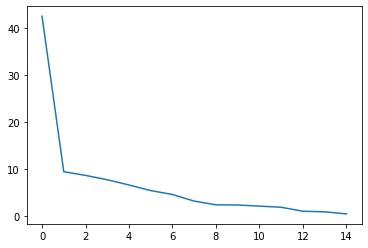

In [91]:
plt.plot(var_exp)

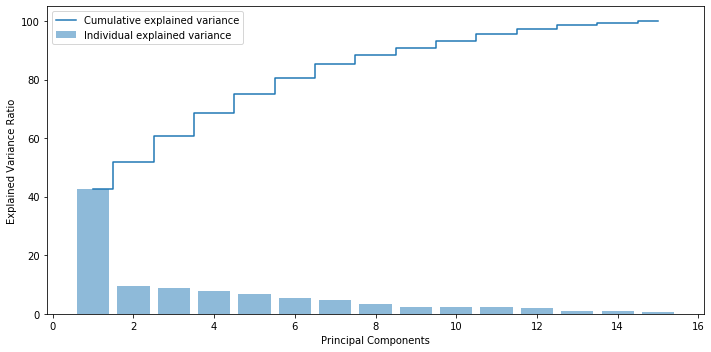

In [92]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [93]:
#generating 12 PCAs
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
data_reduced = pca.fit_transform(X_train2)
d_train=data_reduced.copy()
data_reduced_test=pca.fit_transform(X_test2)
data_reduced.transpose()

array([[-1.53557025, -0.20014314, -3.12370939, ...,  4.91394687,
        -2.04032416, -0.98281004],
       [ 0.41466066,  2.07990906, -2.2054209 , ..., -1.77791542,
         2.59741374,  2.03259305],
       [-0.60594429, -1.17625182, -0.24444206, ..., -1.6398246 ,
         0.41002538, -1.20621816],
       ...,
       [ 1.00670796,  0.70540648,  0.11968909, ..., -0.38434679,
         0.30520615,  0.19238317],
       [ 1.517273  , -0.66624133,  0.8974925 , ...,  0.19735214,
        -0.3608421 ,  0.49782261],
       [ 0.37115759,  0.20031096, -0.66075331, ...,  0.21623   ,
         0.88100754,  0.33613497]])

In [94]:
data_reduced_test

array([[-1.01017128e+00,  2.64866330e+00,  1.42248095e+00, ...,
        -5.96630578e-01,  2.63854210e-01, -6.46294084e-01],
       [-8.72580026e-01, -1.93957964e+00,  5.84079313e-01, ...,
        -2.08058501e-01, -3.13331042e-01,  1.59182702e-01],
       [-4.24061488e-01,  6.95523085e-01,  1.70341283e+00, ...,
         2.44328186e-01, -2.98216356e-01,  4.22336357e-01],
       ...,
       [ 5.77078644e-01,  1.62564044e+00, -1.25719074e+00, ...,
        -4.38825739e-01,  6.39900984e-01,  6.83515220e-01],
       [-1.29276882e+00, -2.41655278e+00, -8.99194199e-01, ...,
         6.82039566e-01, -1.13353823e-03, -6.07133670e-01],
       [-1.05495806e+00, -1.05581746e+00,  4.50829988e-02, ...,
         2.65488848e-01, -4.55422203e-01,  3.17394644e-01]])

In [95]:
pca.components_

array([[ 2.33238873e-02,  1.96106924e-01,  4.29818294e-02,
         1.41237243e-02,  3.30129962e-02, -1.02492755e-02,
        -1.66922824e-02,  3.50284819e-03,  1.30259420e-02,
        -1.25321134e-02, -1.00051434e-02, -2.64220949e-01,
        -2.95043833e-02,  9.36754095e-01, -9.40588159e-02],
       [-5.87274802e-02,  3.53139316e-03,  3.77962841e-01,
        -1.59792524e-02,  3.90168178e-02, -9.13143972e-01,
         1.00614824e-02,  1.47539131e-02, -1.93688790e-02,
         2.71176992e-04, -4.94950040e-02,  1.13801634e-01,
         2.82701948e-02,  8.45516984e-03,  3.32827490e-02],
       [-7.49162068e-02,  1.80392964e-01,  8.41950309e-01,
         4.33591804e-02,  1.16089463e-01,  3.95354655e-01,
        -2.03268889e-02,  7.85072831e-03,  1.25263461e-02,
        -3.38977394e-03, -3.73312702e-02,  2.78547960e-01,
        -1.90361979e-02,  5.60512475e-03,  3.58320019e-02],
       [-2.96229665e-01,  1.07209714e-01, -3.55502001e-01,
         1.73066344e-01,  2.88291874e-01, -1.07518004

In [96]:
e_com_pca=pd.DataFrame(pca.components_,columns=list(X_train2))
e_com_pca.head()

,CityTier,te_g,de_g,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,noa_g,Complain,or_g,co_g,ppm,poc,marit,ca_g,ds_g
0,0.023324,0.196107,0.042982,0.014124,0.033013,-0.010249,-0.016692,0.003503,0.013026,-0.012532,-0.010005,-0.264221,-0.029504,0.936754,-0.094059
1,-0.058727,0.003531,0.377963,-0.015979,0.039017,-0.913144,0.010061,0.014754,-0.019369,0.000271,-0.049495,0.113802,0.028270,0.008455,0.033283
2,-0.074916,0.180393,0.841950,0.043359,0.116089,0.395355,-0.020327,0.007851,0.012526,-0.003390,-0.037331,0.278548,-0.019036,0.005605,0.035832
3,-0.296230,0.107210,-0.355502,0.173066,0.288292,-0.010752,-0.019555,0.007051,0.044288,-0.007349,-0.232918,0.751297,-0.007509,0.198711,0.022475
4,-0.216080,0.724886,-0.082802,-0.238864,-0.524321,-0.024760,-0.011870,0.013826,-0.005925,0.002264,-0.266247,-0.020342,0.003153,-0.129339,0.000585


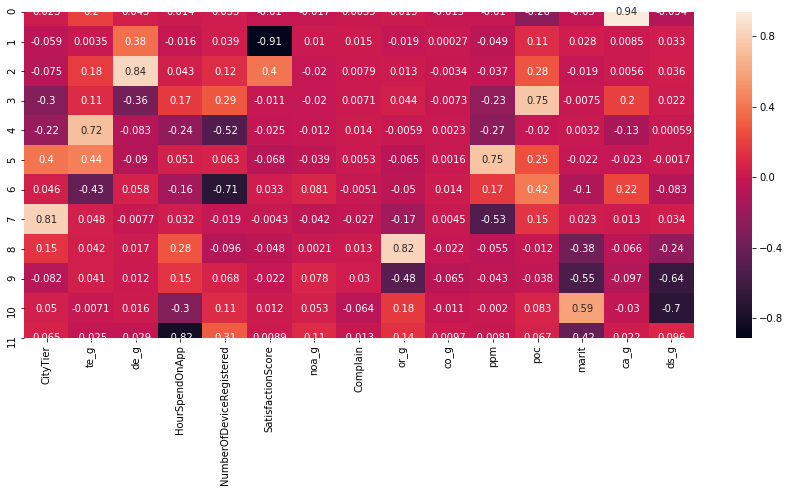

In [97]:
plt.figure(figsize=(15,6))
sns.heatmap(e_com_pca,annot=True)
plt.show()

In [98]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(d_train, y_train2)
y_pred2 = clf.predict(data_reduced_test)
accuracy_score(y_test2, y_pred2)

0.8270462633451957

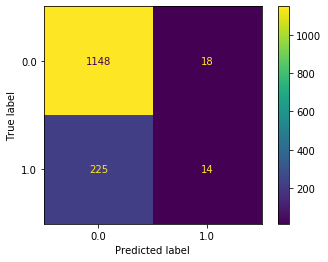

In [99]:
plot_confusion_matrix(clf, data_reduced_test, y_test2)

# Using Scaling on original data(No grouping)

In [100]:
from sklearn.preprocessing import StandardScaler
cols = ['Tenure', 'HourSpendOnApp', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','CashbackAmount','DaySinceLastOrder','PreferedOrderCat','PreferredPaymentMode','MaritalStatus']
e_com_n=e_com_clean[cols]
e_com_n['PreferedOrderCat']=le.fit_transform(e_com_n['PreferedOrderCat'])
e_com_n['PreferredPaymentMode']=le.fit_transform(e_com_n['PreferredPaymentMode'])
e_com_n['MaritalStatus']=le.fit_transform(e_com_n['MaritalStatus'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [101]:
e_com_n

,Tenure,HourSpendOnApp,WarehouseToHome,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,CashbackAmount,DaySinceLastOrder,PreferedOrderCat,PreferredPaymentMode,MaritalStatus
0,4.0,3,6.0,3.0,9.0,11.0,1.0,1.0,159.93,5.0,2,2,2
1,18.2,3,8.0,4.0,7.0,15.0,0.0,1.0,120.90,0.0,3,4,2
2,16.2,2,30.0,4.0,6.0,14.0,0.0,1.0,120.28,3.0,3,2,2
3,15.4,2,15.0,4.0,8.0,23.0,0.0,1.0,134.07,3.0,2,2,2
4,18.2,3,12.0,3.0,3.0,11.0,1.0,1.0,129.60,3.0,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,3,30.0,2.0,6.0,18.0,1.0,2.0,150.71,4.0,2,1,1
5626,13.0,3,13.0,5.0,6.0,16.0,1.0,2.0,224.91,3.2,0,1,1
5627,1.0,3,11.0,2.0,3.0,21.0,1.0,2.0,186.42,4.0,2,2,1
5628,23.0,4,9.0,5.0,4.0,15.0,2.0,2.0,178.90,9.0,2,1,1


In [102]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(e_com_n), columns=e_com_n.columns)

In [103]:
cols = ['Tenure', 'HourSpendOnApp', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'NumberOfAddress','OrderCount','CashbackAmount','DaySinceLastOrder','PreferedOrderCat','PreferredPaymentMode']
X = df_scaled[cols]
y = e_com_clean['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [135]:
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred3 = clf.predict(X_test)
accuracy_score(y_test, y_pred3)

0.9487544483985765

In [139]:
 clf.feature_importances_

array([0.21101198, 0.031398  , 0.12988601, 0.06028055, 0.09514087,
       0.05963362, 0.20189343, 0.10600616, 0.04259184, 0.06215754])

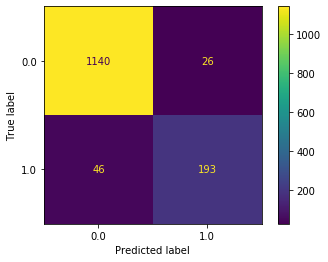

In [105]:
plot_confusion_matrix(clf, X_test, y_test)

In [106]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(clf, X, y, scoring='accuracy', cv = 10)
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.97508897 0.98932384 0.96441281 0.98754448 0.9911032  0.99288256
 0.99644128 0.97686833 0.99286988 0.99643494]
Accuracy of Model with Cross Validation is: 98.6297029326127


## Using random forest We got the above accuracy

In [107]:
clf = AdaBoostClassifier(n_estimators=100,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8419928825622776

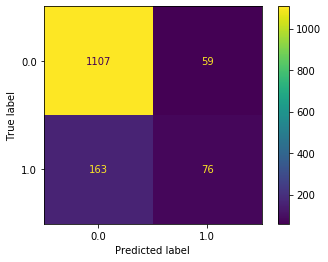

In [108]:
plot_confusion_matrix(clf, X_test, y_test)

In [109]:
xgbmod.fit(X_train, y_train)
y_pred=xgbmod.predict(X_test)
accuracy_score(y_test, y_pred)

0.8740213523131672

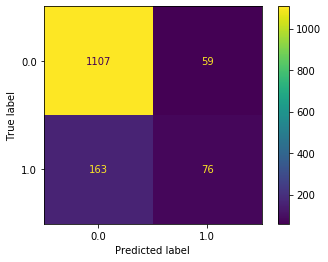

In [110]:
plot_confusion_matrix(clf, X_test, y_test)

In [111]:
clf = GradientBoostingClassifier(n_estimators=100,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8619217081850534

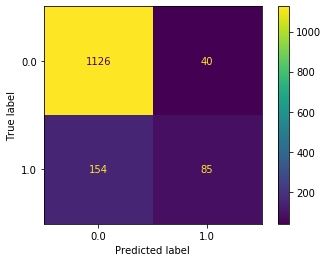

In [112]:
plot_confusion_matrix(clf, X_test, y_test)

In [113]:
cols = ['Tenure', 'HourSpendOnApp', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'NumberOfAddress','OrderCount','CashbackAmount','DaySinceLastOrder','PreferedOrderCat','PreferredPaymentMode']
X = df_scaled[cols]
y = e_com_clean['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [114]:
churnTree = DecisionTreeClassifier()
churnTree.fit(X_train,y_train)
churnTree_pred = churnTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, churnTree_pred))

DecisionTrees's Accuracy:  0.9316725978647686


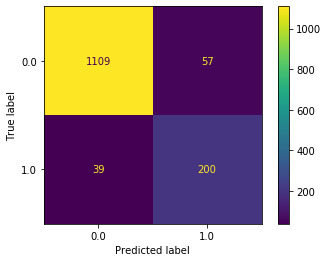

In [115]:
plot_confusion_matrix(churnTree, X_test, y_test)

In [116]:
accuracy = cross_val_score(churnTree, X, y, scoring='accuracy', cv = 10)
print(accuracy)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.98220641 0.98754448 0.94128114 0.98932384 0.98398577 0.99466192
 0.98576512 0.9519573  0.98573975 0.98395722]
Accuracy of Model with Cross Validation is: 97.86422948344656


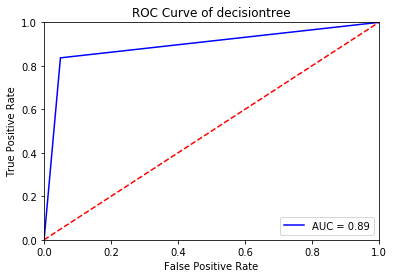

In [117]:
y_scores = churnTree.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of decisiontree')
plt.show()

## Using decision tree we got the above accuracy.  Also the number of False negatives is minimum.

# Hypertuning of Parameters

In [118]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   churnTree = DecisionTreeClassifier(max_depth=max_depth)
   churnTree.fit(X_train, y_train)
   train_pred = churnTree.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = churnTree.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

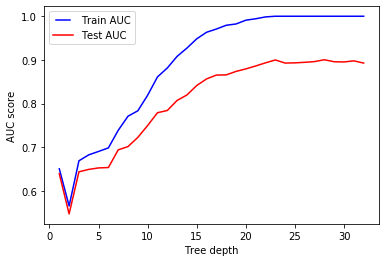

In [119]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [120]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   churnTree = DecisionTreeClassifier(min_samples_split=min_samples_split)
   churnTree.fit(X_train, y_train)
   train_pred = churnTree.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = churnTree.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

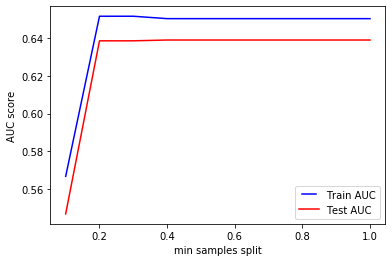

In [121]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [122]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   churnTree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   churnTree.fit(X_train, y_train)
   train_pred = churnTree.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = churnTree.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

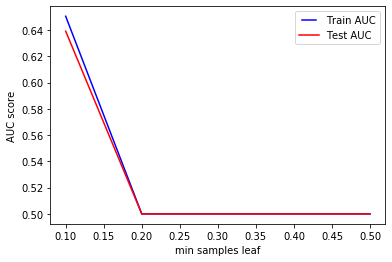

In [123]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [124]:
from sklearn.model_selection import GridSearchCV

In [129]:
pipe = Pipeline([("classifier", RandomForestClassifier())])
grid_param = [
                {"classifier": [DecisionTreeClassifier()],
                 "classifier__criterion":["gini", "entropy"],
                 "classifier__splitter":["best", "random"],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10,None]
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10,None]}]
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) 
best_model = gridsearch.fit(X_train,y_train)

In [130]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Pipeline(steps=[('classifier', RandomForestClassifier(max_depth=25))])
The mean accuracy of the model is: 0.9451957295373665


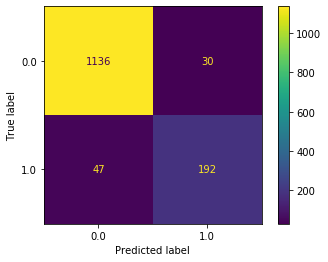

In [131]:
plot_confusion_matrix(best_model, X_test, y_test)